In [1]:
import warnings

warnings.filterwarnings('ignore')

# Working with Unlabeled Data – Clustering Analysis

The goal of `clustering` is to find a natural grouping in data so that items in the
same cluster are more similar to each other than to those from different clusters.

# Grouping objects by similarity using k-means

The k-means algorithm belongs to the category of prototype-based clustering.

Prototype-based clustering means that each cluster is represented by a prototype, which is usually either
the centroid (average) of similar points with continuous features, or the medoid (the most representative
or the point that minimizes the distance to all other points that belong to a particular cluster) in the
case of categorical features.

While k-means is very good at identifying clusters with a spherical shape,
one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, k,
a priori. An inappropriate choice for k can result in poor clustering performance. 

## K-means clustering using scikit-learn

In [2]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

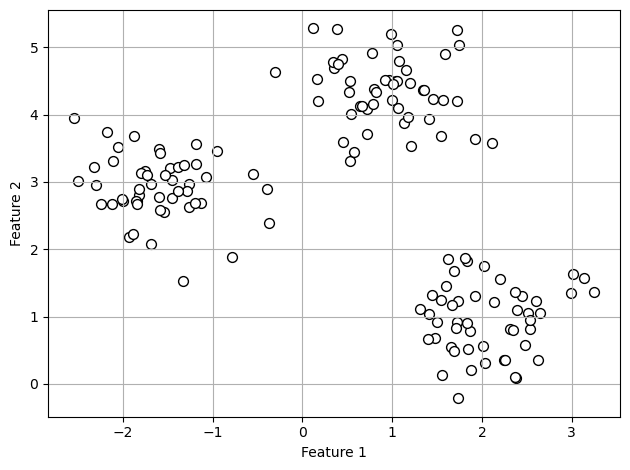

In [3]:
import matplotlib.pyplot as plt


plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.tight_layout()
plt.show()

The dataset that we just created consists of 150 randomly generated points that are roughly grouped
into three regions with higher density

### k-means algorithm steps:
1. Randomly pick k centroids from the examples as initial cluster centers.  
2. Assign each example to the nearest centroid, μ(j), where j ∈ {1, …, k}.  
3. Move the centroids to the center of the examples that were assigned to them.  
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.  

We can define similarity as the
opposite of distance, and a commonly used distance for clustering examples with continuous features
is the squared Euclidean distance between two points, x and y, in m-dimensional space

In [4]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

- We set n_init=10 to run the k-means clustering
algorithms 10 times independently, with different random centroids to choose the final model as the
one with the lowest SSE.

- Via the max_iter parameter, we specify the maximum number of iterations
for each single run.

-  tol, which is a parameter that controls the tolerance with regard to the
changes in the within-cluster SSE to declare convergence.

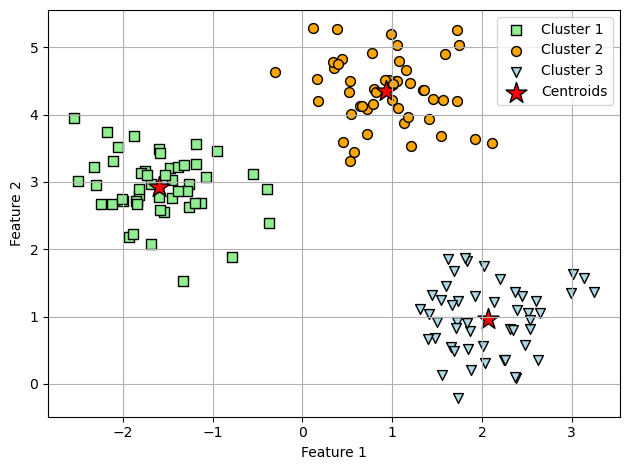

In [5]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

<br>

### A smarter way of placing the initial cluster centroids using k-means++

- The strategy is to place the initial centroids far away from each other via the k-means++ algorithm,
which leads to better and more consistent results than the classic k-means.

- To use k-means++ with scikit-learn’s KMeans object, we just need to set the init parameter to 'k-means++'.
In fact, 'k-means++' is the default argument to the init parameter.

...

## Hard versus soft clustering

- Hard clustering describes a family of algorithms where each example in a dataset is assigned to exactly
one cluster, as in the k-means algorithms. 

- In contrast, algorithms for soft clustering (sometimes also called fuzzy clustering) assign an example
to one or more clusters. A popular example of soft clustering is the fuzzy C-means (FCM) algorithm
(also called soft k-means or fuzzy k-means). 

The FCM procedure is very similar to k-means. However, we replace the hard cluster assignment
with probabilities for each point belonging to each cluster.

...

## Using the elbow method to find the optimal number of clusters 

One of the main challenges in unsupervised learning is that we do not know the definitive answer.

Thus, to quantify the quality of clustering, we need to use
intrinsic metrics—such as the within-cluster SSE (distortion)—to compare the performance of different
k-means clustering models.

Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate
the optimal number of clusters, k, for a given task. We can say that if k increases, the distortion will
decrease.

In [6]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


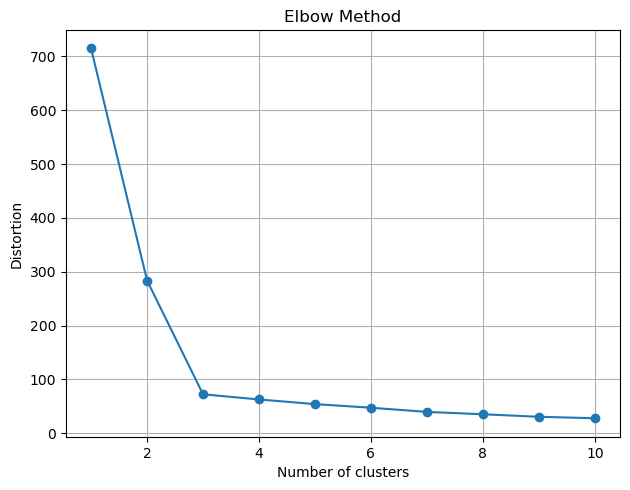

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.title('Elbow Method')
plt.grid()
plt.show()

The idea
behind the elbow method is to identify the value of k where the distortion begins to increase most
rapidly

The elbow is located at k
indeed a good choice for this dataset

<br>

## Quantifying the quality of clustering  via silhouette plots

Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the examples
in the clusters are.

The silhouette coefficient is bounded in the range –1 to 1. 
- 1 means Very Good 
- -1 means Very Bad

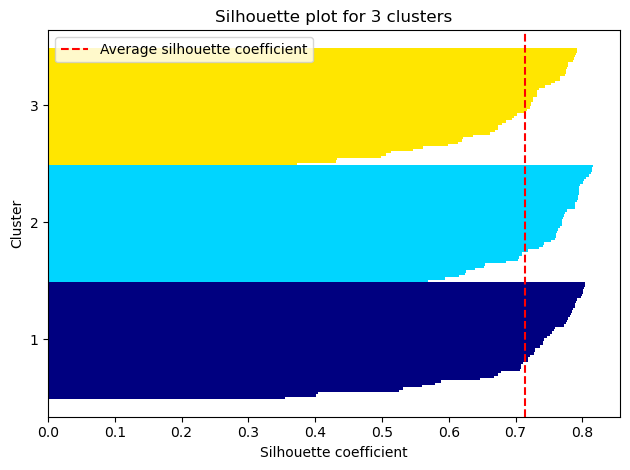

In [8]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average silhouette coefficient")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.legend(loc='upper left')
plt.title("Silhouette plot for 3 clusters")

plt.tight_layout()
plt.show()

Through a visual inspection of the silhouette plot, we can quickly scrutinize the sizes of the different
clusters and identify clusters that contain outliers.

We can see in the preceding silhouette plot, the silhouette coefficients are not close to 0
and are approximately equally far away from the average silhouette score, which is, in this case, an
indicator of good clustering. Also, to summarize the goodness of our clustering, we added
the average silhouette coefficient to the plot (dotted line)

Comparison to "bad" clustering:

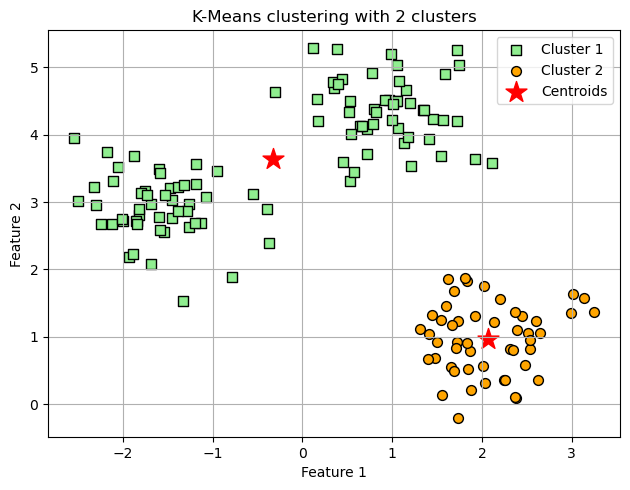

In [9]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.title('K-Means clustering with 2 clusters')
plt.show()

As we can see, one of the centroids falls between two of the three spherical groupings
of the input data.

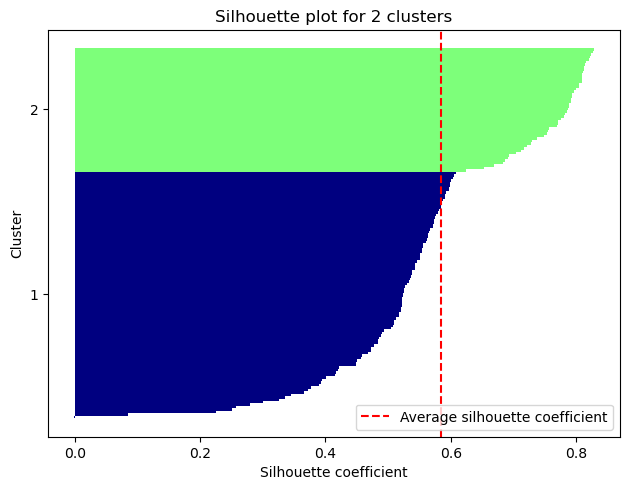

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average silhouette coefficient") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.legend(loc='best')
plt.title("Silhouette plot for 2 clusters")
plt.show()

The silhouettes now have visibly different lengths and widths, which is
evidence of a relatively bad or at least suboptimal clustering

<br>
<br>

# Organizing clusters as a hierarchical tree

- One advantage of the hierarchical clustering algorithm is that it allows us to plot dendro-
grams (visualizations of a binary hierarchical clustering), which can help with the interpretation of
the results by creating meaningful taxonomies. 

- Another advantage of this hierarchical approach is
that we do not need to specify the number of clusters upfront.

## Hierarchical Clustering

The two main approaches to hierarchical clustering are `agglomerative` and `divisive` hierarchical clustering. 

- In divisive hierarchical clustering, we start with one cluster that encompasses the complete
dataset, and we iteratively split the cluster into smaller clusters until each cluster only contains one
example. 

- The agglomerative clustering takes the opposite approach.
We start with each example as an individual cluster and merge the closest pairs of clusters until only
one cluster remains.

### Agglormerative Clustering

The two standard algorithms for agglomerative hierarchical clustering are `single linkage` and `complete linkage`. 

- Using single linkage, we compute the distances between the most similar members for each
pair of clusters and merge the two clusters for which the distance between the most similar members
is the smallest. 

- The complete linkage approach is similar to single linkage but, instead of comparing
the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge.

#### Agglomerative clustering using the Complete linkage

1. Compute a pair-wise distance matrix of all examples.  
2. Represent each data point as a singleton cluster.  
3. Merge the two closest clusters based on the distance between the most dissimilar (distant) members.  
4. Update the cluster linkage matrix.  
5. Repeat steps 3-4 until one single cluster remains.  


let’s generate a random
data sample to work with. The rows represent different observations (IDs 0-4), and the columns are
the different features (X, Y, Z) of those examples

In [11]:
import pandas as pd
import numpy as np


np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

### Performing hierarchical clustering on a distance matrix

In [12]:
from scipy.spatial.distance import pdist, squareform


row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [13]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage


row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


the linkage matrix consists of several rows where each row represents one
merge. The first and second columns denote the most dissimilar members in each cluster, and the
third column reports the distance between those members.

In [14]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [15]:
# 3. correct approach: Input matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


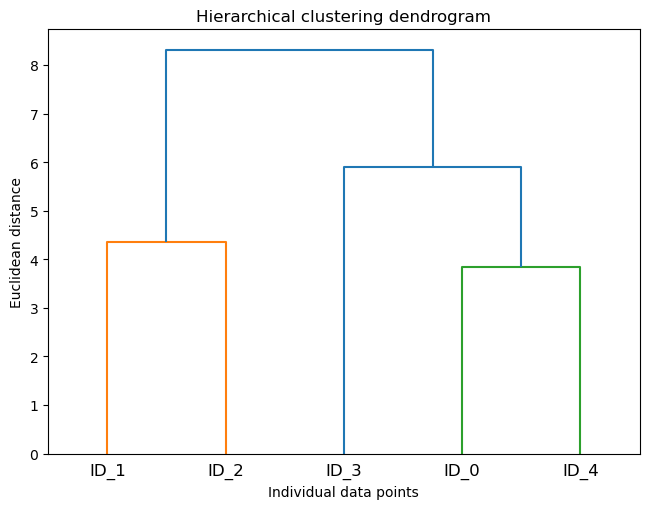

In [16]:
from scipy.cluster.hierarchy import dendrogram


# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.xlabel('Individual data points')
plt.ylabel('Euclidean distance')
plt.title('Hierarchical clustering dendrogram')
plt.show()

<br>

### Attaching dendrograms to a heat map

In practical applications, hierarchical clustering dendrograms are often used in combination with a
heat map, which allows us to represent the individual values in the data array or matrix containing
our training examples with a color code

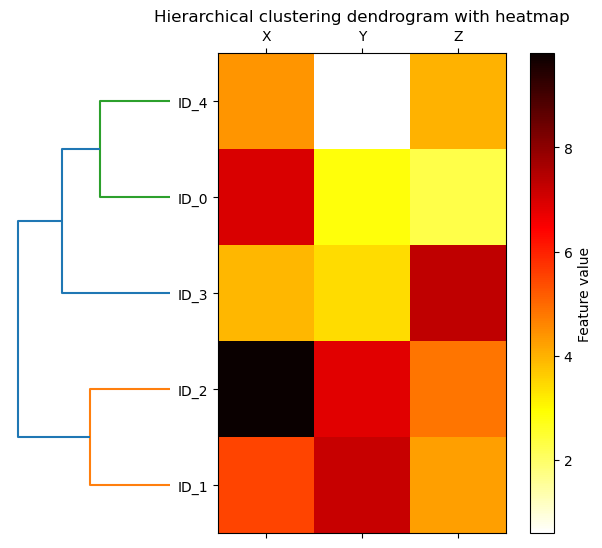

In [17]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax, label='Feature value')

axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.title('Hierarchical clustering dendrogram with heatmap')
plt.show()

<br>

## Applying agglomerative clustering via scikit-learn

In [18]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                                metric="euclidean",
                                linkage="complete"
                            )

labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [19]:

ac = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="complete"
                            )

labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


<br>
<br>

# Locating regions of high density via DBSCAN

As its name implies, density-based clustering assigns cluster labels based on dense regions of points. In DBSCAN, the notion of density is defined as the number of points within a specified radius, 𝜀 .
- --

According to the DBSCAN algorithm, a special label is assigned to each example (data point) using
the following criteria:

- A point is considered a core point if at least a specified number (MinPts) of neighboring points
fall within the specified radius, 𝜀

- A border point is a point that has fewer neighbors than MinPts within 𝜀, but lies within the 𝜀
radius of a core point

- All other points that are neither core nor border points are considered noise points
- --

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two
simple steps:

1. Form a separate cluster for each core point or connected group of core points. (Core points
are connected if they are no farther away than 𝜀.)
2. Assign each border point to the cluster of its corresponding core point.

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Also, DBSCAN is different from k-means and hierarchical clustering
in that it doesn’t necessarily assign each point to a cluster but is capable of removing noise points.

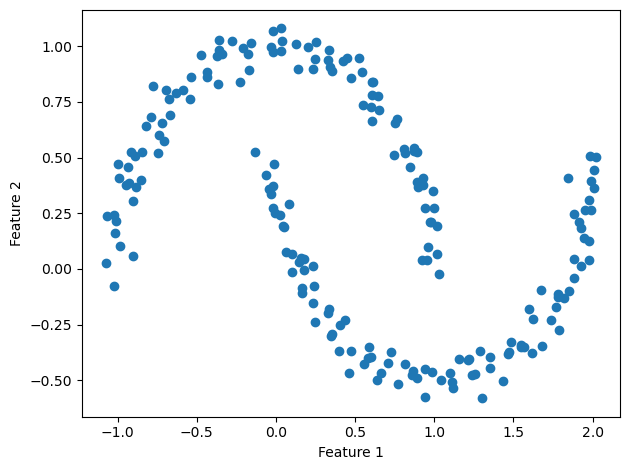

In [20]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

K-means and hierarchical clustering:

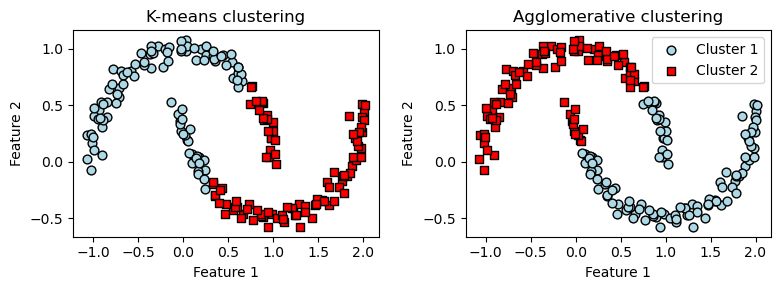

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.legend()
plt.tight_layout()
plt.show()

Density-based clustering:

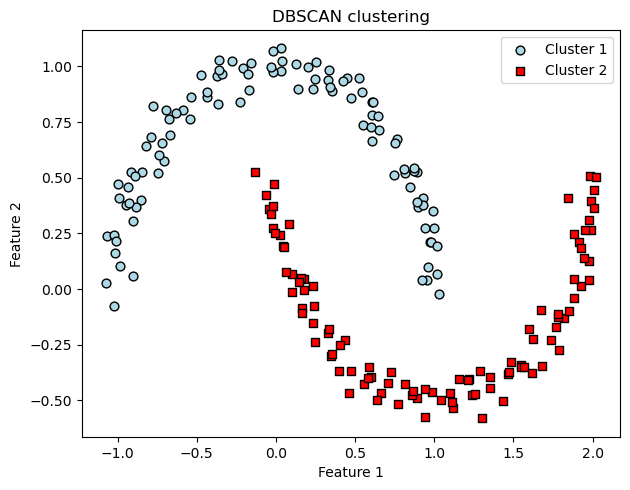

In [22]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.tight_layout()
plt.title('DBSCAN clustering')
plt.show()

The DBSCAN algorithm can successfully detect the half-moon shapes, which highlights one of the
strengths of DBSCAN—clustering data of arbitrary shapes

<br>
<br>